## 1. Find a dataset and import it into PySpark

In [ ]:
## importing pyspark
from pyspark.sql import SparkSession

# initialize a spark session
spark = SparkSession.builder.getOrCreate()

import pandas as pd

data = pd.read_csv('/content/carbon_table.csv')

data.to_csv('carbon_table.csv', index = False)


In [ ]:

df = spark.read.csv('/content/carbon_table.csv', header = True, inferSchema=True)

df.printSchema()
df.show(5)

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- KilotonsCo2: double (nullable = true)
 |-- MetricTonsPerCapita: double (nullable = true)

+-----------+------+----------+-----------+-------------------+
|    Country|Region|      Date|KilotonsCo2|MetricTonsPerCapita|
+-----------+------+----------+-----------+-------------------+
|Afghanistan|  Asia|01/01/2011|     8930.0|               0.31|
|Afghanistan|  Asia|01/01/2012|     8080.0|               0.27|
|Afghanistan|  Asia|01/01/2010|     7110.0|               0.25|
|Afghanistan|  Asia|01/01/2019|     6080.0|               0.16|
|Afghanistan|  Asia|01/01/2018|     6070.0|               0.17|
+-----------+------+----------+-----------+-------------------+
only showing top 5 rows



## 2. Create a Temporary SQL View

In [69]:
df.createOrReplaceTempView('Carbon_Emissions')

spark.sql('SELECT * FROM Carbon_Emissions LIMIT 10').show()

+-----------+------+----------+-----------+-------------------+
|    Country|Region|      Date|KilotonsCo2|MetricTonsPerCapita|
+-----------+------+----------+-----------+-------------------+
|Afghanistan|  Asia|01/01/2011|     8930.0|               0.31|
|Afghanistan|  Asia|01/01/2012|     8080.0|               0.27|
|Afghanistan|  Asia|01/01/2010|     7110.0|               0.25|
|Afghanistan|  Asia|01/01/2019|     6080.0|               0.16|
|Afghanistan|  Asia|01/01/2018|     6070.0|               0.17|
|Afghanistan|  Asia|01/01/2013|     5990.0|               0.19|
|Afghanistan|  Asia|01/01/2015|     5950.0|               0.18|
|Afghanistan|  Asia|01/01/2016|     5300.0|               0.15|
|Afghanistan|  Asia|01/01/2014|     4880.0|               0.15|
|Afghanistan|  Asia|01/01/2009|     4880.0|               0.18|
+-----------+------+----------+-----------+-------------------+



## Analysis questions


1.What are the top 10 countries with the highest CO₂ emissions?

2.How have global CO₂ emissions changed over time?

3.What is the average CO₂ emission per capita by country?

4.Which countries have had the highest emissions growth rate over the last decade?

5.What is the correlation between a country’s GDP and its CO₂ emissions?

6.What is the distribution of CO₂ emissions by continent?

7.How do emissions compare between high-income and low-income countries?

In [ ]:
# 1. What are the top 10 countries with the highest CO₂ emissions?
from pyspark.sql.functions import sum

spark.sql("SELECT Country, SUM(KilotonsCo2) AS Kilotons_of_Co2 FROM Carbon_Emissions GROUP BY Country order by Kilotons_of_Co2 desc LIMIT 10").show()

+--------------+--------------------+
|       Country|     Kilotons_of_Co2|
+--------------+--------------------+
|         China|      1.8072282926E8|
| United States|1.5831788067999998E8|
|        Russia| 5.002866996000001E7|
|         India|       3.988272997E7|
|         Japan|3.5076589730000004E7|
|       Germany| 2.436702003000001E7|
|        Canada|       1.543650005E7|
|United Kingdom|       1.482421001E7|
|   South Korea|       1.440726999E7|
|          Iran|       1.294062992E7|
+--------------+--------------------+



In [ ]:
# 2. Global CO₂ emissions change over time
global_emissions_over_time = spark.sql("SELECT Date, SUM(KilotonsCo2) AS  Kilotons_of_Co2 FROM Carbon_Emissions GROUP BY Date ORDER BY Date")
global_emissions_over_time.show()

+----------+--------------------+
|      Date|     Kilotons_of_Co2|
+----------+--------------------+
|01/01/1990|           2.03418E7|
|01/01/1991|          2.048254E7|
|01/01/1992|          2.051304E7|
|01/01/1993|          2.065112E7|
|01/01/1994|          2.076525E7|
|01/01/1995|          2.135675E7|
|01/01/1996|          2.180764E7|
|01/01/1997|          2.218302E7|
|01/01/1998|            2.2303E7|
|01/01/1999|          2.240613E7|
|01/01/2000|          2.312339E7|
|01/01/2001|          2.351834E7|
|01/01/2002|        2.38333498E7|
|01/01/2003|       2.493990031E7|
|01/01/2004|2.6073289890000004E7|
|01/01/2005|       2.703967003E7|
|01/01/2006|2.7916500200000003E7|
|01/01/2007|2.8968049919999998E7|
|01/01/2008|       2.919115984E7|
|01/01/2009|2.8867640009999998E7|
+----------+--------------------+
only showing top 20 rows



There is a gradual increase in the CO2 emission over the years with no sign of significant reduction. It is eviident that the same trend is likely to continue unless some drastic and extreme measures are employed to bring the curve down.

In [ ]:
# 3. Average CO₂ emission per capita by country
avg_emission_per_capita = spark.sql("SELECT Country, AVG(MetricTonsPerCapita) AS avg_MetricTonsPerCapita FROM Carbon_Emissions GROUP BY Country ORDER BY avg_MetricTonsPerCapita DESC LIMIT 10")
avg_emission_per_capita.show()

+-------------+-----------------------+
|      Country|avg_MetricTonsPerCapita|
+-------------+-----------------------+
|        Qatar|     38.540666666666674|
|          UAE|     25.111666666666668|
|       Kuwait|     23.585333333333335|
|      Bahrain|     22.069666666666667|
|   Luxembourg|      21.55966666666667|
|United States|     18.151666666666664|
|    Australia|      16.88266666666667|
|       Canada|     15.920999999999994|
|       Brunei|     15.894666666666664|
| Saudi Arabia|     13.306999999999995|
+-------------+-----------------------+



1.A country like China has high total CO₂ emissions due to its large population, but its per capita emissions are often lower than smaller, more industrialized nations like Qatar or the United States.

2.Developed countries like the U.S. and Australia typically have higher per capita emissions than developing countries, reflecting industrial activities, transportation use, and energy-intensive lifestyles.

3.Scandinavian countries, despite being highly developed, often have lower per capita emissions due to their high use of renewable energy, whereas countries relying on coal tend to have higher per capita emissions.

4.Oil-rich countries in the Middle East, with smaller populations and higher GDP per capita, often show high emissions per capita, driven by energy-intensive infrastructure, desalination, and air conditioning.

In [77]:
df_new = spark.sql("""SELECT
Country,
Region,
KilotonsCo2,
MetricTonsPerCapita,
    Date,
    CAST(LEFT(Date, 2) AS INT) AS day,
    CAST(SUBSTRING(Date, 4, 2) AS INT) AS month,
    CAST(RIGHT(Date, 4) AS INT) AS year
FROM Carbon_Emissions
""")
df_new.show()

## I would like this data to appear of the Carbon_Emissions table but it is not appearing.
##This is for the purpose of analysing the growth rates hence the year factor(int type) is required.

+-----------+------+-----------+-------------------+----------+---+-----+----+
|    Country|Region|KilotonsCo2|MetricTonsPerCapita|      Date|day|month|year|
+-----------+------+-----------+-------------------+----------+---+-----+----+
|Afghanistan|  Asia|     8930.0|               0.31|01/01/2011|  1|    1|2011|
|Afghanistan|  Asia|     8080.0|               0.27|01/01/2012|  1|    1|2012|
|Afghanistan|  Asia|     7110.0|               0.25|01/01/2010|  1|    1|2010|
|Afghanistan|  Asia|     6080.0|               0.16|01/01/2019|  1|    1|2019|
|Afghanistan|  Asia|     6070.0|               0.17|01/01/2018|  1|    1|2018|
|Afghanistan|  Asia|     5990.0|               0.19|01/01/2013|  1|    1|2013|
|Afghanistan|  Asia|     5950.0|               0.18|01/01/2015|  1|    1|2015|
|Afghanistan|  Asia|     5300.0|               0.15|01/01/2016|  1|    1|2016|
|Afghanistan|  Asia|     4880.0|               0.15|01/01/2014|  1|    1|2014|
|Afghanistan|  Asia|     4880.0|               0.18|

In [82]:
##Register it as a Temporary View in Spark SQL

df_new.createOrReplaceTempView("Modified_DateEmissions")

In [85]:
spark.sql('SELECT * FROM Modified_DateEmissions LIMIT 10').show()

+-----------+------+-----------+-------------------+----------+---+-----+----+
|    Country|Region|KilotonsCo2|MetricTonsPerCapita|      Date|day|month|year|
+-----------+------+-----------+-------------------+----------+---+-----+----+
|Afghanistan|  Asia|     8930.0|               0.31|01/01/2011|  1|    1|2011|
|Afghanistan|  Asia|     8080.0|               0.27|01/01/2012|  1|    1|2012|
|Afghanistan|  Asia|     7110.0|               0.25|01/01/2010|  1|    1|2010|
|Afghanistan|  Asia|     6080.0|               0.16|01/01/2019|  1|    1|2019|
|Afghanistan|  Asia|     6070.0|               0.17|01/01/2018|  1|    1|2018|
|Afghanistan|  Asia|     5990.0|               0.19|01/01/2013|  1|    1|2013|
|Afghanistan|  Asia|     5950.0|               0.18|01/01/2015|  1|    1|2015|
|Afghanistan|  Asia|     5300.0|               0.15|01/01/2016|  1|    1|2016|
|Afghanistan|  Asia|     4880.0|               0.15|01/01/2014|  1|    1|2014|
|Afghanistan|  Asia|     4880.0|               0.18|

In [86]:
##Testing the new table to displa values in 2010 only

spark.sql('SELECT * FROM Modified_DateEmissions where year == 2010 LIMIT 10').show()

+-------------------+--------+-----------+-------------------+----------+---+-----+----+
|            Country|  Region|KilotonsCo2|MetricTonsPerCapita|      Date|day|month|year|
+-------------------+--------+-----------+-------------------+----------+---+-----+----+
|        Afghanistan|    Asia|     7110.0|               0.25|01/01/2010|  1|    1|2010|
|            Albania|  Europe|     4450.0|               1.53|01/01/2010|  1|    1|2010|
|            Algeria|  Africa|   114180.0|               3.18|01/01/2010|  1|    1|2010|
|            Andorra|  Europe|      520.0|               7.27|01/01/2010|  1|    1|2010|
|             Angola|  Africa|    22800.0|               0.98|01/01/2010|  1|    1|2010|
|Antigua And Barbuda|Americas|      490.0|               5.72|01/01/2010|  1|    1|2010|
|          Argentina|Americas|   167220.0|                4.1|01/01/2010|  1|    1|2010|
|            Armenia|    Asia|     4340.0|               1.47|01/01/2010|  1|    1|2010|
|          Australia|

In [88]:
# 4. Highest emissions growth rate over the last decade reference date 2019 by country
growth_rate_last_decade = spark.sql("""
    SELECT Country, (SUM(CASE WHEN year >= 2010 THEN KilotonsCo2 ELSE 0 END) - SUM(CASE WHEN year < 2010 THEN KilotonsCo2 ELSE 0 END)) / SUM(CASE WHEN year < 2010 THEN KilotonsCo2 ELSE 1 END) * 100 AS Growth_Rate
    FROM Modified_DateEmissions
    WHERE year >= 2000
    GROUP BY Country
    ORDER BY Growth_Rate DESC
""")

growth_rate_last_decade.show()

+------------+------------------+
|     Country|       Growth_Rate|
+------------+------------------+
|     Lao PDR| 580.8219178082192|
|        Chad|317.01680672268907|
| Afghanistan|245.24590163934428|
|    Cambodia|214.66758053461277|
| Timor-Leste|           196.875|
|Burkina Faso|191.66666666666669|
|       Nepal|186.14732724902217|
|  Mozambique|183.79530916844348|
|      Bhutan|175.88652482269504|
|     Burundi| 146.7741935483871|
|       Niger| 141.8043202033037|
|     Vietnam|141.21813030674534|
|      Zambia|140.66985645933013|
|    Ethiopia|137.38532110091742|
|        Mali|130.83952027412906|
|    Tanzania|119.55121545813424|
|     Myanmar|117.24063941637164|
|      Uganda| 116.1567877629063|
|  Bangladesh|110.27954489845852|
|    Maldives|109.02679830747533|
+------------+------------------+
only showing top 20 rows



In [89]:
# 5. Highest emissions growth rate over the last decade reference date 2019 per Region
growth_rate_last_decade = spark.sql("""
    SELECT Region, (SUM(CASE WHEN year >= 2010 THEN KilotonsCo2 ELSE 0 END) - SUM(CASE WHEN year < 2010 THEN KilotonsCo2 ELSE 0 END)) / SUM(CASE WHEN year < 2010 THEN KilotonsCo2 ELSE 1 END) * 100 AS Growth_Rate
    FROM Modified_DateEmissions
    WHERE year >= 2000
    GROUP BY Region
    ORDER BY Growth_Rate DESC
""")

growth_rate_last_decade.show()

+--------+------------------+
|  Region|       Growth_Rate|
+--------+------------------+
|    Asia|59.284103789366306|
|  Africa| 33.35072692920745|
| Oceania|  4.53992131264198|
|Americas|-3.556658403997579|
|  Europe|-10.17594591339455|
+--------+------------------+



In [ ]:
# 6. What is the distribution of CO₂ emissions by region?
from pyspark.sql.functions import sum

spark.sql("SELECT Region, SUM(KilotonsCo2) AS Kilotons_of_Co2 FROM Carbon_Emissions GROUP BY Region order by Kilotons_of_Co2 desc LIMIT 10").show()

+--------+--------------------+
|  Region|     Kilotons_of_Co2|
+--------+--------------------+
|    Asia|3.6712977895000005E8|
|Americas|2.1460027071000004E8|
|  Europe|1.7936528989999992E8|
|  Africa|2.9144590010000005E7|
| Oceania|1.1518039990000002E7|
+--------+--------------------+



## 5. Visualization

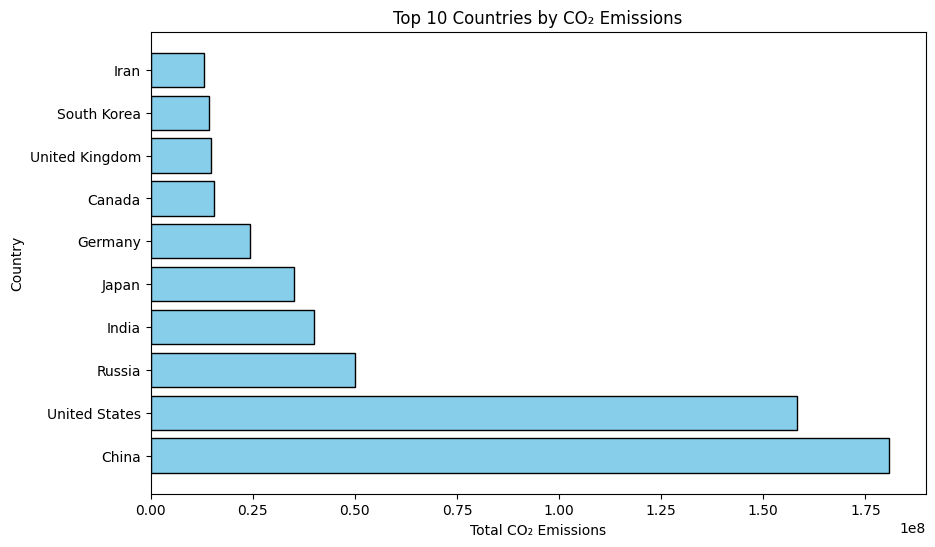

In [ ]:
#Import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization

top_10_countries_pd = spark.sql("SELECT Country, SUM(KilotonsCo2) AS Kilotons_of_Co2 FROM Carbon_Emissions GROUP BY Country order by Kilotons_of_Co2 desc LIMIT 10")
top_10_countries_pd = top_10_countries_pd.toPandas()

# Plot the top 10 countries
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_pd['Country'], top_10_countries_pd['Kilotons_of_Co2'], color='skyblue', edgecolor = 'black')
plt.xlabel("Total CO₂ Emissions")
plt.ylabel("Country")
plt.title("Top 10 Countries by CO₂ Emissions")

plt.show()

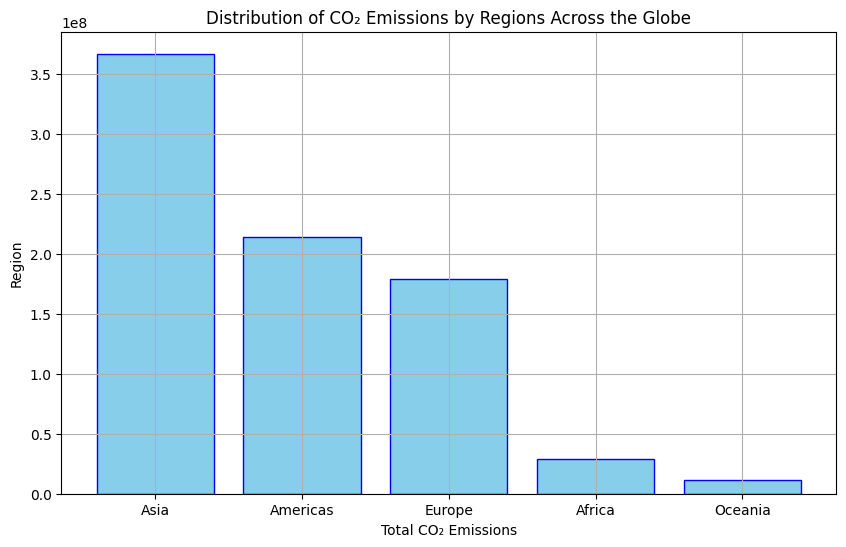

In [ ]:
#Visualise the distribution of Co2 per region.

#Import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization

RegionsDistribution = spark.sql("SELECT Region, SUM(KilotonsCo2) AS Kilotons_of_Co2 FROM Carbon_Emissions GROUP BY Region order by Kilotons_of_Co2 desc")
RegionsDistribution = RegionsDistribution.toPandas()

# Plot the top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(RegionsDistribution['Region'], RegionsDistribution['Kilotons_of_Co2'], color='skyblue', edgecolor = 'blue')
plt.xlabel("Total CO₂ Emissions")
plt.ylabel("Region")
plt.title("Distribution of CO₂ Emissions by Regions Across the Globe")
plt.grid(True)

plt.show()

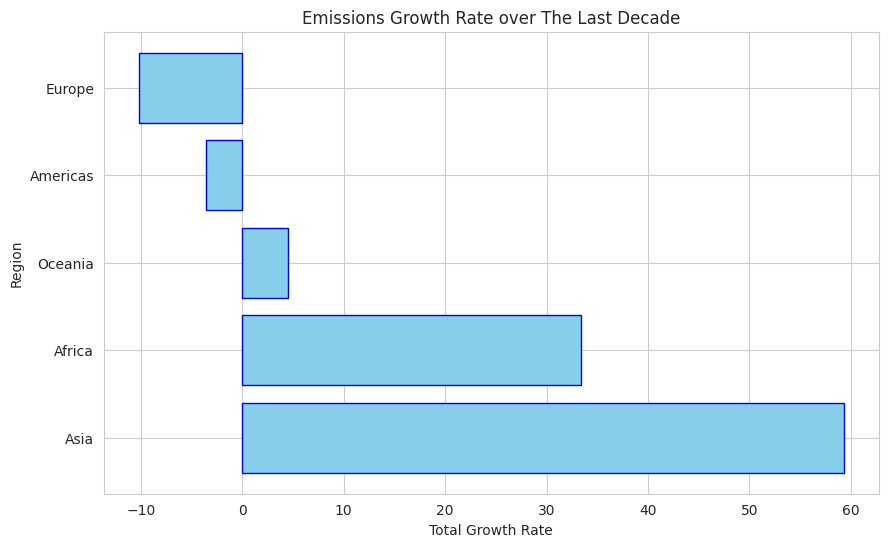

In [95]:
# Visualise emissions growth rate over the last decade reference date 2019 per Region
# Data is growth_rate_last_decade

#growth_rate_last_decade = growth_rate_last_decade.toPandas()

# Plot the Regions growth Rates
plt.figure(figsize=(10, 6))
plt.barh(growth_rate_last_decade['Region'], growth_rate_last_decade['Growth_Rate'], color='skyblue', edgecolor = 'blue')
plt.xlabel("Total Growth Rate")
plt.ylabel("Region")
plt.title("Emissions Growth Rate over The Last Decade")
plt.grid(True)

plt.show()

## 6. Fitting an ML Model Using PySpark

In [ ]:
##create an ML model to predict CO₂ emissions based on
##factors like year, Region, country

In [98]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Assemble feature columns into a single vector column
assembler = VectorAssembler(inputCols=["Region", "Country"], outputCol="features")
Carbon_Emissions_ml = assembler.transform(Carbon_Emissions)

# Split data into training and testing sets
train_data, test_data = Carbon_Emissions_ml.randomSplit([0.7, 0.3])

# Initialize Linear Regression model
lr = LinearRegression(labelCol="Kilotons_of_Co2", featuresCol="features")

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Kilotons_of_Co2", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


IllegalArgumentException: Region does not exist. Available: Date, day, month, year

In [100]:
spark.sql('select * from Carbon_Emissions')

DataFrame[Country: string, Region: string, Date: string, KilotonsCo2: double, MetricTonsPerCapita: double]